# Linear Regression 

## import library

In [2]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data for training and testing

In [27]:
fname_data  = './assignment_07_data.csv'

data        = np.genfromtxt(fname_data, delimiter=',')
num_data    = data.shape[0]

xx          = np.zeros(num_data)
yy          = np.zeros(num_data)
zz          = np.zeros(num_data)

for i in range(num_data):

    xx[i] = data[i,0]
    yy[i] = data[i,1]
    zz[i] = data[i,2]

## plot the data in the three dimensional space

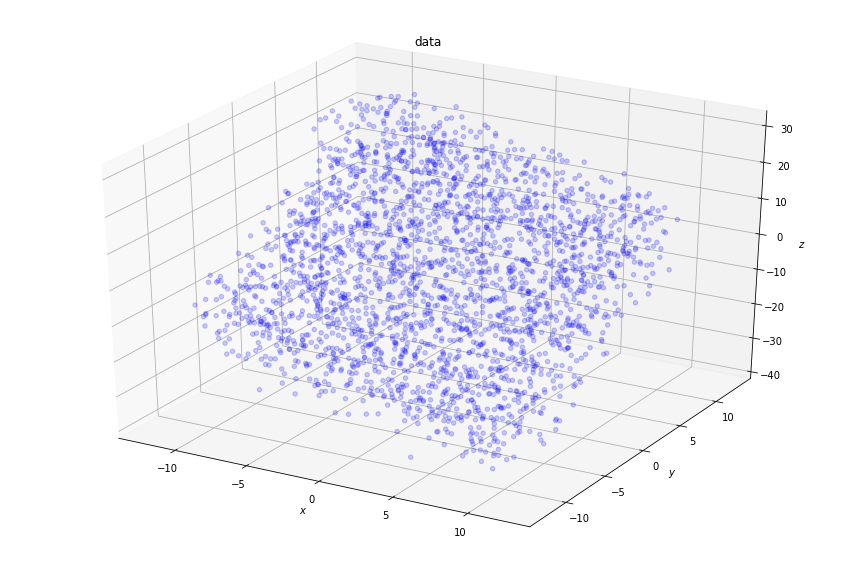

In [28]:
fig = plt.figure(figsize=(12, 8))

ax1 = plt.subplot(111, projection='3d')
plt.title('data')

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')

ax1.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)

plt.tight_layout()
plt.show()

## compute the loss function

In [29]:
def compute_residual(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    
    num_data = len(x)
    
    fhat = np.dot(theta, np.array([[1]*num_data, x, y]))
    residual = z - fhat
    
    # ============================
    return residual, num_data

In [30]:
def compute_loss(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    
    residual, num_data = compute_residual(theta, x, y, z)
    loss = 0.5 * (1/num_data) * np.sum(np.power(residual, 2))
    
    # ============================
    return loss

## compute the gradient for each model parameter (DO NOT COMPUTE THE GRADIENT FOR EACH MODEL PARAMETER, BUT DO COMPUTE THE GRADIENT OF THE MODEL PARAMTER VECTOR)

In [45]:
def compute_gradient(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    
    residual, num_data = compute_residual(theta, x, y, z)
    
    XT = np.array([[1]*num_data, x, y])
    X = XT.T 
    
    grad = (1/num_data) * XT@(X@theta - z)
    #grad = (1/num_data) * np.sum(X * np.array([[1]*num_data, x, y]), axis=1)
    
    # ============================
    return grad

## gradient descent for each model parameter

In [46]:
num_iteration   = 1000
learning_rate   = 0.01

theta           = np.array((0, 0, 0))
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration)

for i in range(num_iteration):
    # ===== FILL UP THE CODE =====

    theta = theta - learning_rate * compute_gradient(theta, xx, yy, zz)
    loss = compute_loss(theta, xx, yy, zz)
    
    theta_iteration[i] = theta
    loss_iteration[i] = loss
    
    # ============================
    print("iteration = %4d, loss = %5.5f" % (i, loss))
    print(compute_gradient(theta, xx, yy, zz))

iteration =    0, loss = 46.08423
[  2.98346334  22.00887736 -44.57076145]
iteration =    1, loss = 25.70661
[  2.95134602  14.14926207 -28.61661077]
iteration =    2, loss = 17.25197
[  2.92036602   9.09630018 -18.37326277]
iteration =    3, loss = 13.71586
[  2.89022018   5.84776007 -11.7965217 ]
iteration =    4, loss = 12.20934
[ 2.86071267  3.75929171 -7.57391992]
iteration =    5, loss = 11.54086
[ 2.83171667  2.41663502 -4.86279169]
iteration =    6, loss = 11.21896
[ 2.80314968  1.55345892 -3.12210537]
iteration =    7, loss = 11.04093
[ 2.77495768  0.99853807 -2.00449234]
iteration =    8, loss = 10.92313
[ 2.74710501  0.64179157 -1.28692473]
iteration =    9, loss = 10.83106
[ 2.71956773  0.41244878 -0.82620741]
iteration =   10, loss = 10.75047
[ 2.69232951  0.2650117  -0.53040177]
iteration =   11, loss = 10.67546
[ 2.66537889  0.17023015 -0.34047841]
iteration =   12, loss = 10.60359
[ 2.63870756  0.10929959 -0.21853735]
iteration =   13, loss = 10.53382
[ 2.61230922  0.07

iteration =  131, loss = 7.43980
[ 7.97947944e-01 -1.15678219e-04  6.04679317e-05]
iteration =  132, loss = 7.43347
[ 7.89968472e-01 -1.14521438e-04  5.98632530e-05]
iteration =  133, loss = 7.42726
[ 7.82068794e-01 -1.13376224e-04  5.92646210e-05]
iteration =  134, loss = 7.42117
[ 7.74248114e-01 -1.12242463e-04  5.86719754e-05]
iteration =  135, loss = 7.41521
[ 7.66505640e-01 -1.11120039e-04  5.80852562e-05]
iteration =  136, loss = 7.40936
[ 7.58840590e-01 -1.10008840e-04  5.75044041e-05]
iteration =  137, loss = 7.40363
[ 7.51252192e-01 -1.08908753e-04  5.69293606e-05]
iteration =  138, loss = 7.39802
[ 7.43739677e-01 -1.07819666e-04  5.63600676e-05]
iteration =  139, loss = 7.39251
[ 7.36302287e-01 -1.06741471e-04  5.57964674e-05]
iteration =  140, loss = 7.38712
[ 7.28939271e-01 -1.05674057e-04  5.52385032e-05]
iteration =  141, loss = 7.38183
[ 7.21649885e-01 -1.04617317e-04  5.46861187e-05]
iteration =  142, loss = 7.37665
[ 7.14433393e-01 -1.03571145e-04  5.41392581e-05]
iter

iteration =  256, loss = 7.14725
[ 2.27182250e-01 -3.29345268e-05  1.72157105e-05]
iteration =  257, loss = 7.14674
[ 2.24910429e-01 -3.26051819e-05  1.70435535e-05]
iteration =  258, loss = 7.14623
[ 2.22661327e-01 -3.22791303e-05  1.68731181e-05]
iteration =  259, loss = 7.14574
[ 2.20434716e-01 -3.19563393e-05  1.67043871e-05]
iteration =  260, loss = 7.14526
[ 2.18230371e-01 -3.16367762e-05  1.65373434e-05]
iteration =  261, loss = 7.14478
[ 2.16048069e-01 -3.13204088e-05  1.63719701e-05]
iteration =  262, loss = 7.14432
[ 2.13887590e-01 -3.10072050e-05  1.62082506e-05]
iteration =  263, loss = 7.14386
[ 2.11748717e-01 -3.06971332e-05  1.60461682e-05]
iteration =  264, loss = 7.14342
[ 2.09631231e-01 -3.03901622e-05  1.58857067e-05]
iteration =  265, loss = 7.14298
[ 2.07534921e-01 -3.00862608e-05  1.57268498e-05]
iteration =  266, loss = 7.14255
[ 2.05459574e-01 -2.97853985e-05  1.55695814e-05]
iteration =  267, loss = 7.14213
[ 2.03404980e-01 -2.94875448e-05  1.54138858e-05]
iter

iteration =  385, loss = 7.12337
[ 6.21319561e-02 -9.00724672e-06  4.70831576e-06]
iteration =  386, loss = 7.12334
[ 6.15106371e-02 -8.91717434e-06  4.66123265e-06]
iteration =  387, loss = 7.12330
[ 6.08955313e-02 -8.82800268e-06  4.61462036e-06]
iteration =  388, loss = 7.12326
[ 6.02865766e-02 -8.73972273e-06  4.56847421e-06]
iteration =  389, loss = 7.12322
[ 5.96837114e-02 -8.65232559e-06  4.52278951e-06]
iteration =  390, loss = 7.12319
[ 5.90868748e-02 -8.56580241e-06  4.47756166e-06]
iteration =  391, loss = 7.12315
[ 5.84960066e-02 -8.48014447e-06  4.43278608e-06]
iteration =  392, loss = 7.12312
[ 5.79110471e-02 -8.39534311e-06  4.38845826e-06]
iteration =  393, loss = 7.12309
[ 5.73319372e-02 -8.31138975e-06  4.34457371e-06]
iteration =  394, loss = 7.12305
[ 5.67586183e-02 -8.22827593e-06  4.30112801e-06]
iteration =  395, loss = 7.12302
[ 5.61910327e-02 -8.14599325e-06  4.25811678e-06]
iteration =  396, loss = 7.12299
[ 5.56291229e-02 -8.06453339e-06  4.21553565e-06]
iter

[ 1.58380623e-02 -2.29603805e-06  1.20019718e-06]
iteration =  522, loss = 7.12157
[ 1.56796819e-02 -2.27307769e-06  1.18819522e-06]
iteration =  523, loss = 7.12156
[ 1.55228852e-02 -2.25034693e-06  1.17631328e-06]
iteration =  524, loss = 7.12156
[ 1.53676565e-02 -2.22784348e-06  1.16455016e-06]
iteration =  525, loss = 7.12156
[ 1.52139801e-02 -2.20556507e-06  1.15290467e-06]
iteration =  526, loss = 7.12156
[ 1.50618404e-02 -2.18350944e-06  1.14137564e-06]
iteration =  527, loss = 7.12155
[ 1.49112221e-02 -2.16167437e-06  1.12996189e-06]
iteration =  528, loss = 7.12155
[ 1.47621101e-02 -2.14005764e-06  1.11866228e-06]
iteration =  529, loss = 7.12155
[ 1.46144891e-02 -2.11865709e-06  1.10747567e-06]
iteration =  530, loss = 7.12155
[ 1.44683443e-02 -2.09747054e-06  1.09640092e-06]
iteration =  531, loss = 7.12155
[ 1.43236610e-02 -2.07649585e-06  1.08543692e-06]
iteration =  532, loss = 7.12154
[ 1.41804246e-02 -2.05573091e-06  1.07458256e-06]
iteration =  533, loss = 7.12154
[ 1.

iteration =  663, loss = 7.12145
[ 3.80102094e-03 -5.51032602e-07  2.88038682e-07]
iteration =  664, loss = 7.12145
[ 3.76301076e-03 -5.45522282e-07  2.85158298e-07]
iteration =  665, loss = 7.12145
[ 3.72538069e-03 -5.40067064e-07  2.82306718e-07]
iteration =  666, loss = 7.12145
[ 3.68812692e-03 -5.34666395e-07  2.79483656e-07]
iteration =  667, loss = 7.12145
[ 3.65124568e-03 -5.29319736e-07  2.76688819e-07]
iteration =  668, loss = 7.12145
[ 3.61473326e-03 -5.24026545e-07  2.73921932e-07]
iteration =  669, loss = 7.12145
[ 3.57858596e-03 -5.18786285e-07  2.71182717e-07]
iteration =  670, loss = 7.12145
[ 3.54280014e-03 -5.13598429e-07  2.68470891e-07]
iteration =  671, loss = 7.12145
[ 3.50737217e-03 -5.08462448e-07  2.65786186e-07]
iteration =  672, loss = 7.12145
[ 3.47229848e-03 -5.03377827e-07  2.63128324e-07]
iteration =  673, loss = 7.12145
[ 3.43757553e-03 -4.98344054e-07  2.60497046e-07]
iteration =  674, loss = 7.12145
[ 3.40319980e-03 -4.93360617e-07  2.57892077e-07]
iter

[ 1.13795242e-03 -1.64968544e-07  8.62332274e-08]
iteration =  784, loss = 7.12144
[ 1.12657291e-03 -1.63318862e-07  8.53708992e-08]
iteration =  785, loss = 7.12144
[ 1.11530719e-03 -1.61685674e-07  8.45171961e-08]
iteration =  786, loss = 7.12144
[ 1.10415413e-03 -1.60068817e-07  8.36720243e-08]
iteration =  787, loss = 7.12144
[ 1.09311260e-03 -1.58468132e-07  8.28353028e-08]
iteration =  788, loss = 7.12144
[ 1.08218148e-03 -1.56883452e-07  8.20069535e-08]
iteration =  789, loss = 7.12144
[ 1.07135968e-03 -1.55314619e-07  8.11868817e-08]
iteration =  790, loss = 7.12144
[ 1.06064609e-03 -1.53761473e-07  8.03750134e-08]
iteration =  791, loss = 7.12144
[ 1.05003964e-03 -1.52223861e-07  7.95712621e-08]
iteration =  792, loss = 7.12144
[ 1.03953925e-03 -1.50701625e-07  7.87755511e-08]
iteration =  793, loss = 7.12144
[ 1.02914387e-03 -1.49194607e-07  7.79877986e-08]
iteration =  794, loss = 7.12144
[ 1.01885244e-03 -1.47702661e-07  7.72079234e-08]
iteration =  795, loss = 7.12144
[ 1.

[ 2.78645427e-04 -4.03951264e-08  2.11155555e-08]
iteration =  924, loss = 7.12144
[ 2.75858976e-04 -3.99911729e-08  2.09043999e-08]
iteration =  925, loss = 7.12144
[ 2.73100389e-04 -3.95912601e-08  2.06953593e-08]
iteration =  926, loss = 7.12144
[ 2.70369387e-04 -3.91953482e-08  2.04884054e-08]
iteration =  927, loss = 7.12144
[ 2.67665696e-04 -3.88033956e-08  2.02835184e-08]
iteration =  928, loss = 7.12144
[ 2.64989041e-04 -3.84153632e-08  2.00806873e-08]
iteration =  929, loss = 7.12144
[ 2.62339154e-04 -3.80312115e-08  1.98798752e-08]
iteration =  930, loss = 7.12144
[ 2.59715764e-04 -3.76508993e-08  1.96810767e-08]
iteration =  931, loss = 7.12144
[ 2.57118609e-04 -3.72743887e-08  1.94842664e-08]
iteration =  932, loss = 7.12144
[ 2.54547426e-04 -3.69016474e-08  1.92894274e-08]
iteration =  933, loss = 7.12144
[ 2.52001954e-04 -3.65326303e-08  1.90965287e-08]
iteration =  934, loss = 7.12144
[ 2.49481936e-04 -3.61673036e-08  1.89055655e-08]
iteration =  935, loss = 7.12144
[ 2.

In [47]:
f = theta[0] + theta[1] * xx + theta[2] * yy

In [48]:
print(f)
print(f.shape)

[-15.2534382  -16.20248525 -12.75505532 ...   8.2055347   10.18477997
   6.04535842]
(2500,)


## plot the results

In [49]:
num = np.arange(num_iteration)

def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss')
    # ===== FILL UP THE CODE =====
    
    plt.plot(num, loss_iteration, '-', color = 'red')

    # ============================
    plt.tight_layout()
    plt.show()

In [50]:
def plot_data(xx, yy, zz):
    
    fig = plt.figure(figsize=(12, 8))
    ax  = plt.subplot(111, projection='3d')
    plt.title('data')
    # ===== FILL UP THE CODE =====
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')

    ax.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)

    # ============================    
    plt.tight_layout()
    plt.show()

In [51]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    # ===== FILL UP THE CODE =====

    plt.plot(num, theta_iteration[:,0], '-', color = 'red')
    plt.plot(num, theta_iteration[:,1], '-', color = 'green')
    plt.plot(num, theta_iteration[:,2], '-', color = 'blue')
    
    # ============================
    plt.tight_layout()
    plt.show()

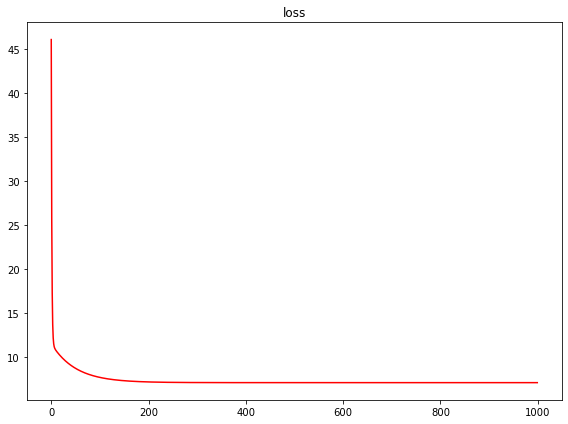

In [52]:
plot_loss_curve(loss_iteration)

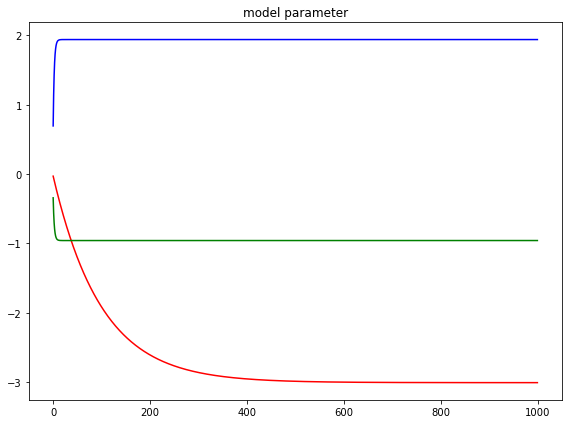

In [53]:
plot_model_parameter(theta_iteration)

In [54]:
# ===== FILL UP THE CODE =====

XX = np.arange(-10, 10, 0.1)
YY = np.arange(-10, 10, 0.1)
gridX, gridY = np.meshgrid(XX, YY)

print(type(np.array([[1]*num_data, XX, YY])))
ZZ = np.dot(theta, np.array([[1]*num_data, XX, YY]))

# f = theta[0] + theta[1] * xx + theta[2] * yy
# ============================

def plot_surface(XX, YY, ZZ, xx, yy, zz):
 
    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111, projection='3d')
    plt.title('loss surface')

    ax  = plt.axes(projection='3d')
    # ===== FILL UP THE CODE =====

    surf = ax.plot_surface(gridX, gridY, f, rstride=3,cstride=3, cmap='viridis', linewidth=0, antialiased=False, edgecolor='none')

    # ============================
    plt.tight_layout()
    plt.show()

<class 'numpy.ndarray'>


TypeError: can't multiply sequence by non-int of type 'float'

In [42]:
plot_surface(XX, YY, ZZ, xx, yy, zz)

NameError: name 'plot_surface' is not defined

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point in 3-dimensional space

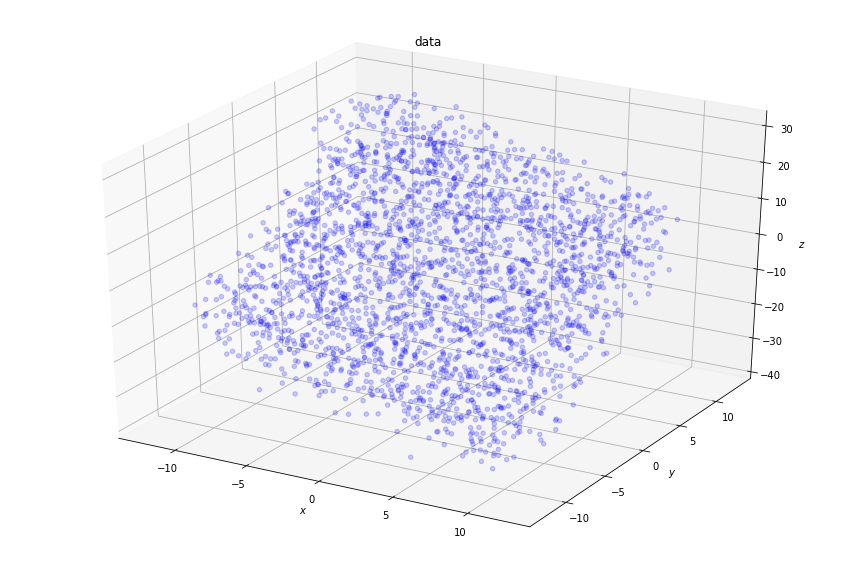

In [148]:
plot_data(xx, yy, zz)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

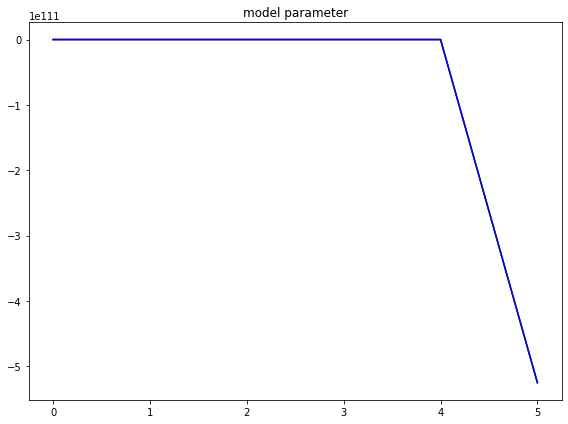

In [43]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

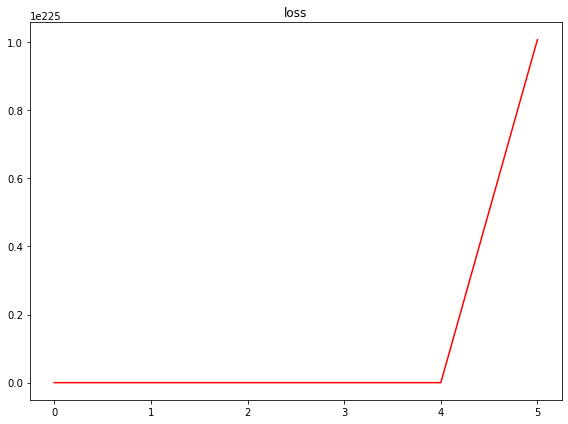

In [44]:
plot_loss_curve(loss_iteration)

### # 04. plot the optimal regression surface $\hat{f}(\theta^*)$ in 3-dimensional space with a given set of data points superimposed

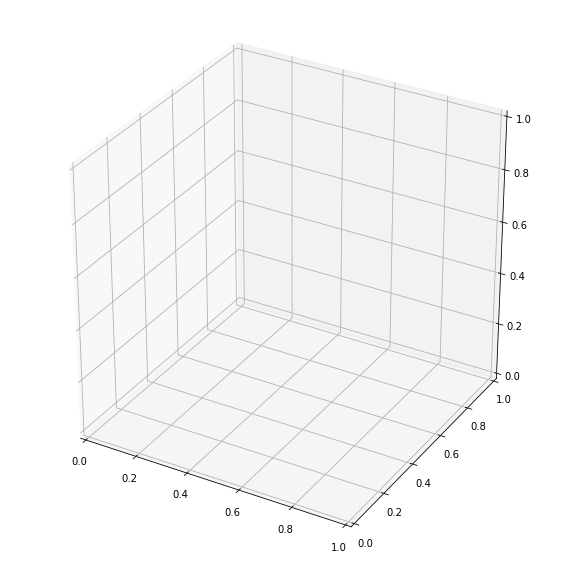

In [151]:
plot_surface(XX, YY, ZZ, xx, yy, zz)